In [74]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

sns.set_style('darkgrid')

In [75]:
df=sns.load_dataset("diamonds")

In [33]:
df

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...,...
53935,0.72,Ideal,D,SI1,60.8,57.0,2757,5.75,5.76,3.50
53936,0.72,Good,D,SI1,63.1,55.0,2757,5.69,5.75,3.61
53937,0.70,Very Good,D,SI1,62.8,60.0,2757,5.66,5.68,3.56
53938,0.86,Premium,H,SI2,61.0,58.0,2757,6.15,6.12,3.74


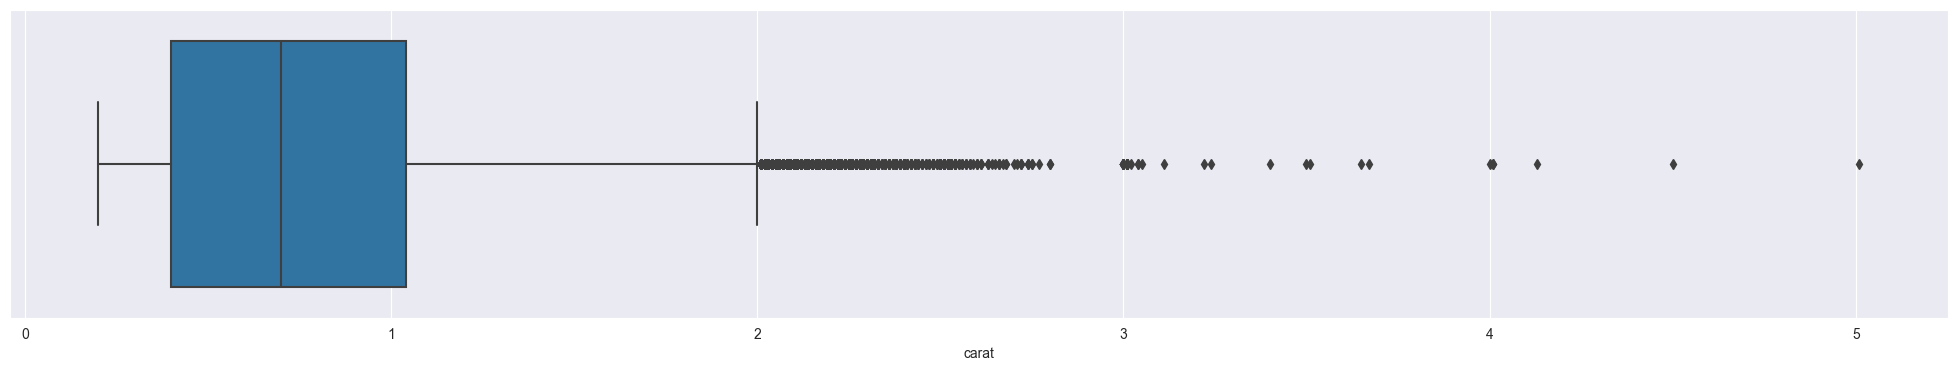

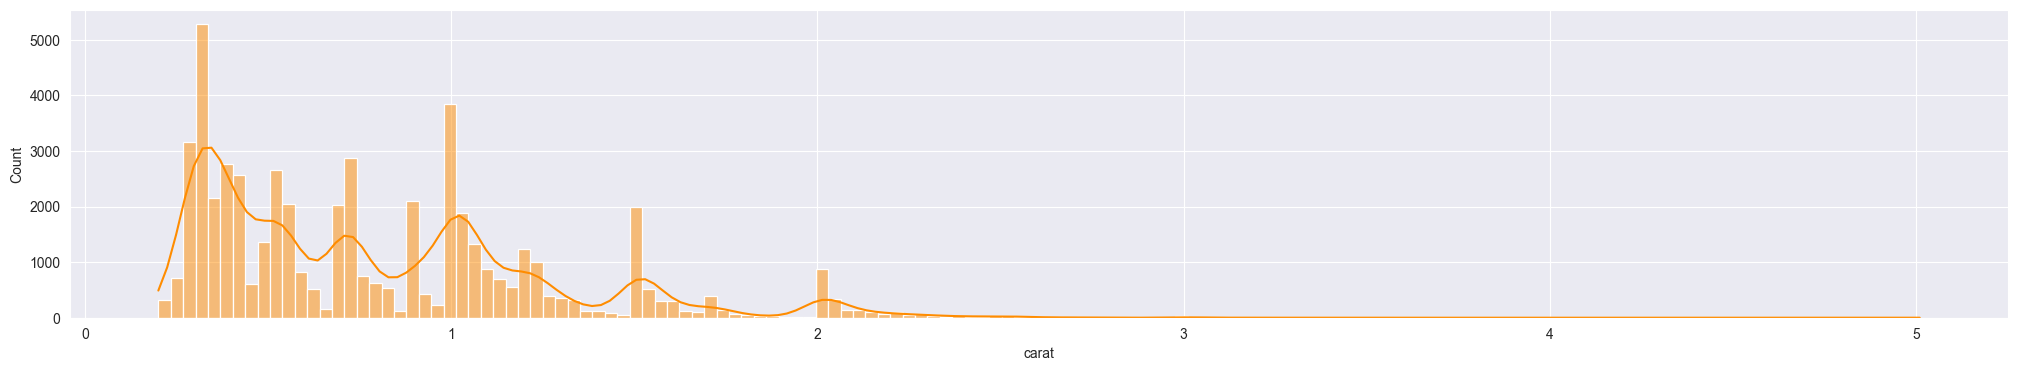

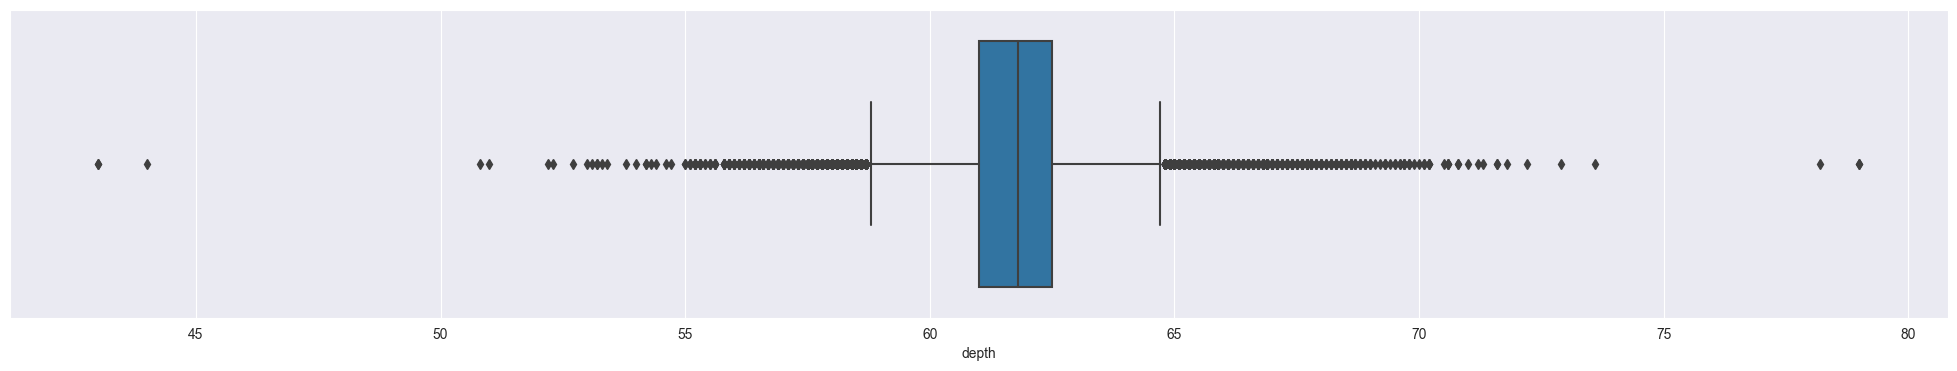

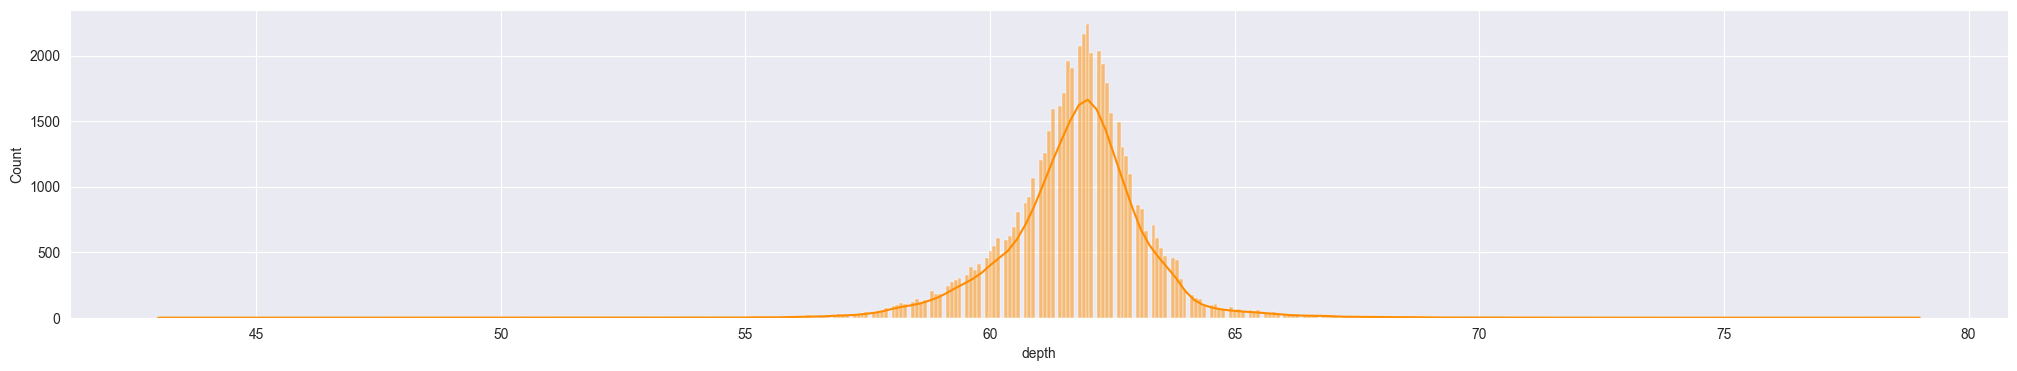

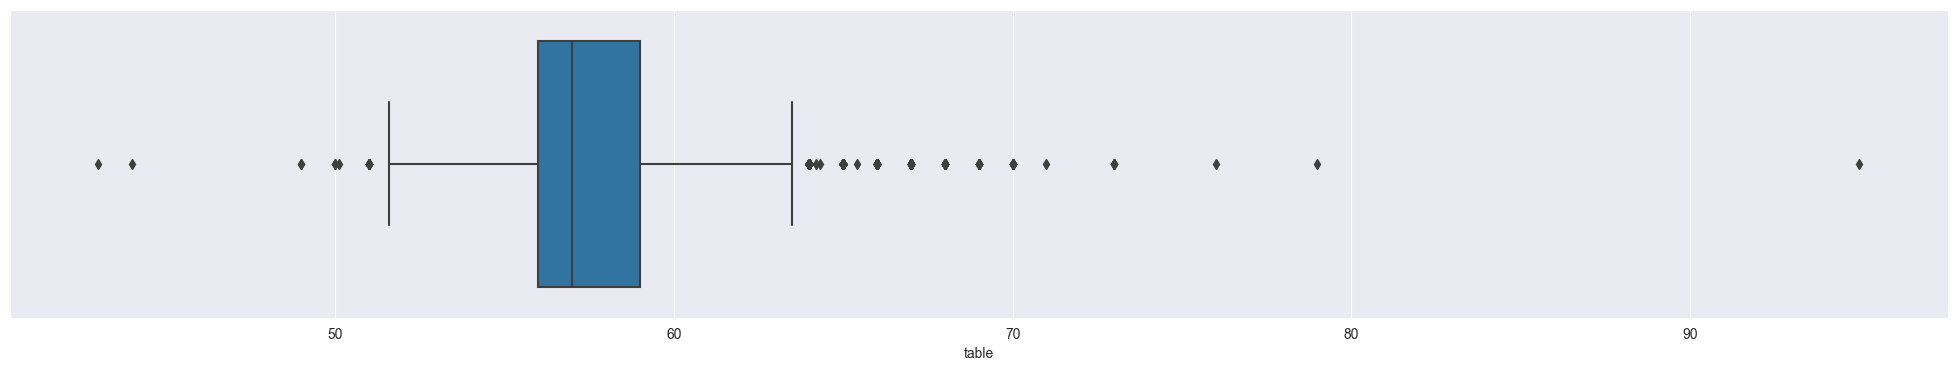

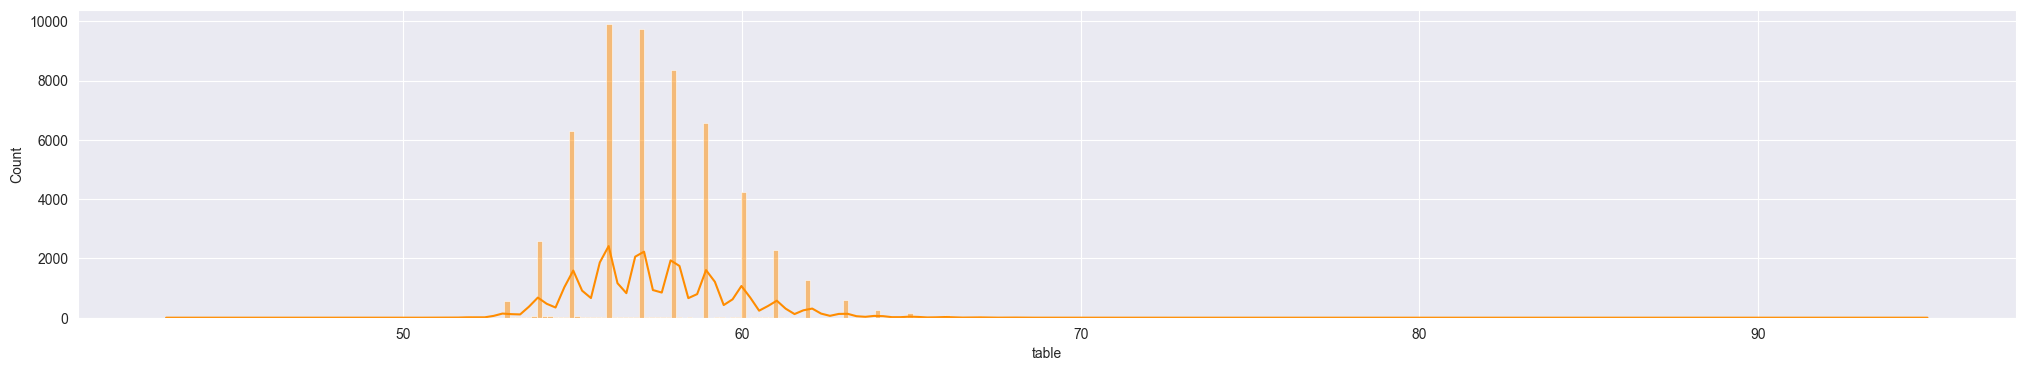

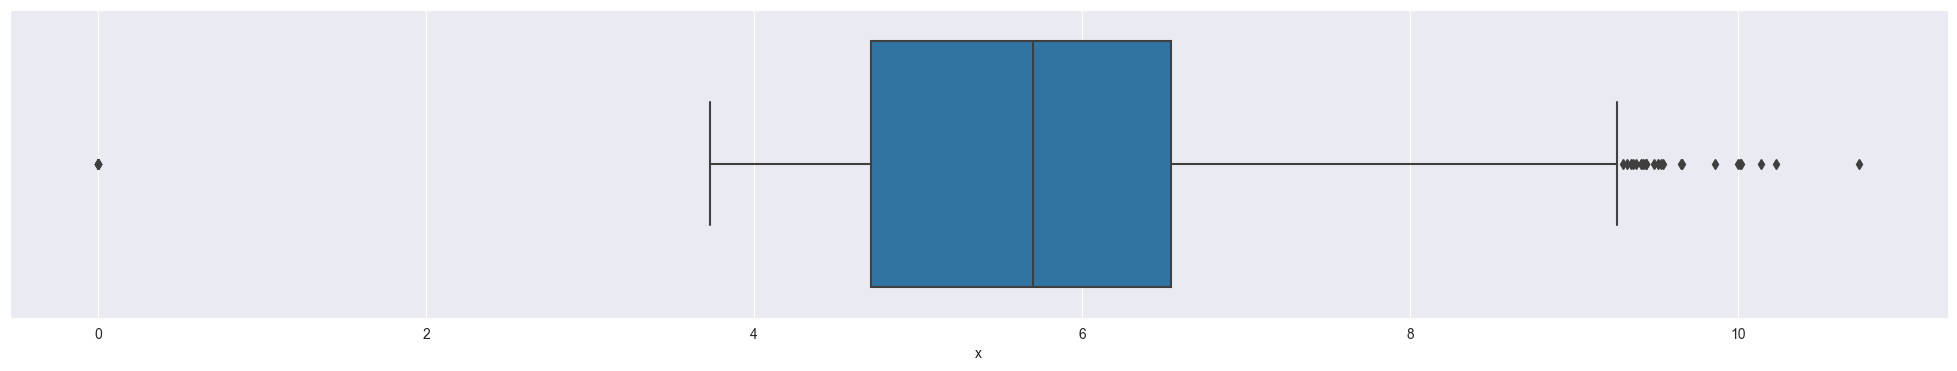

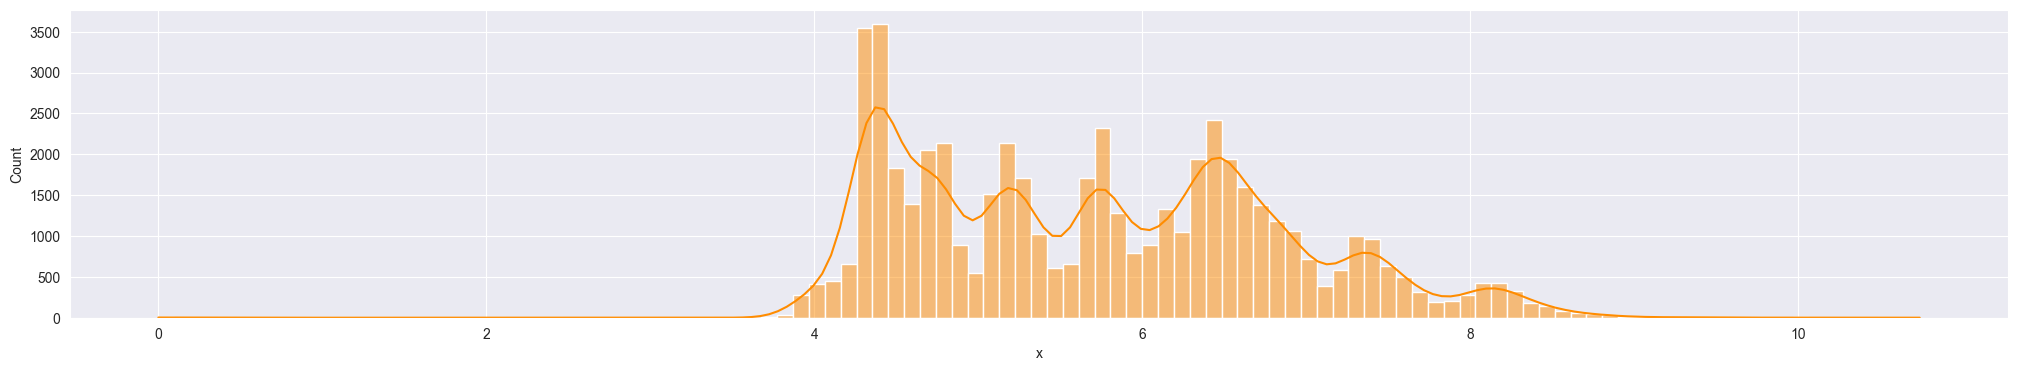

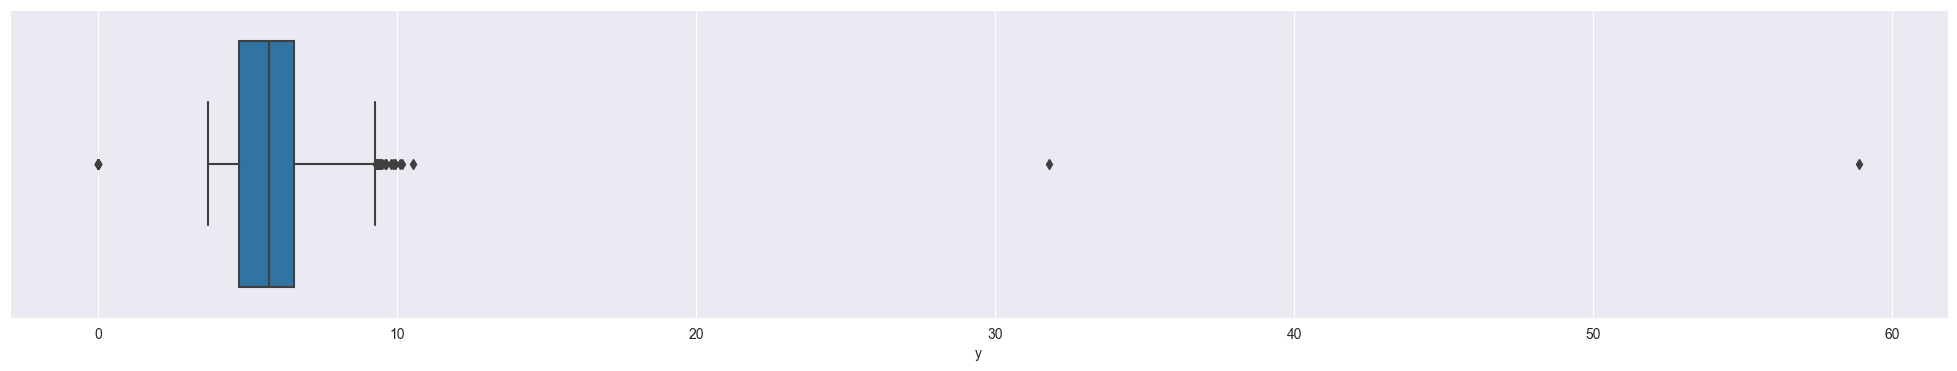

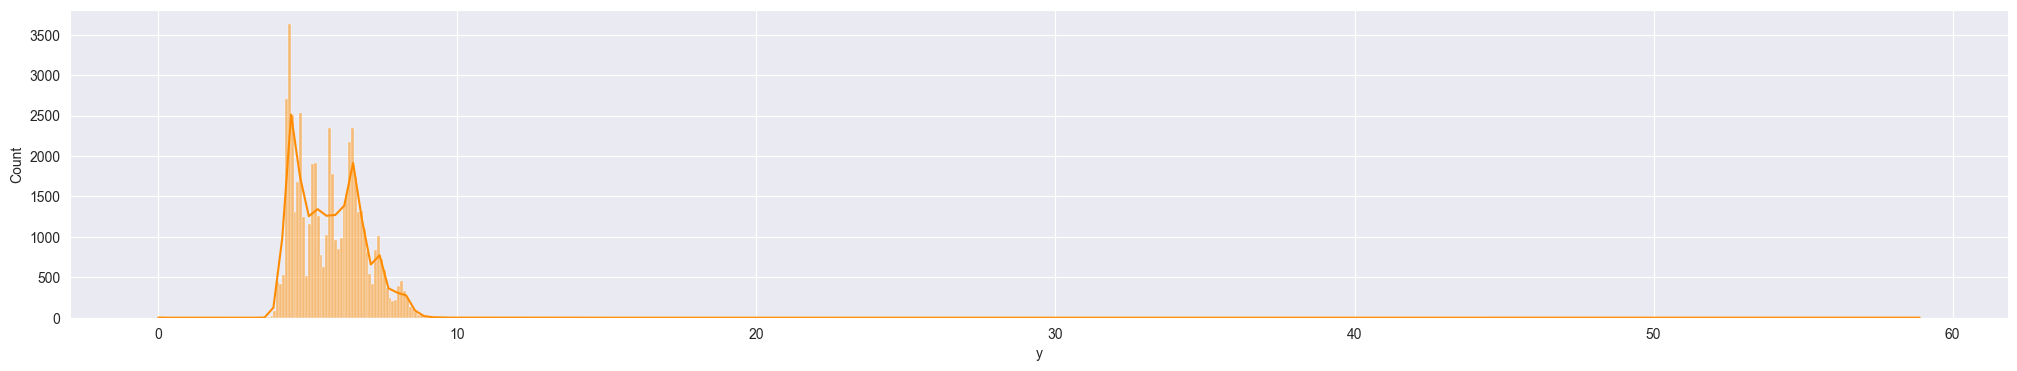

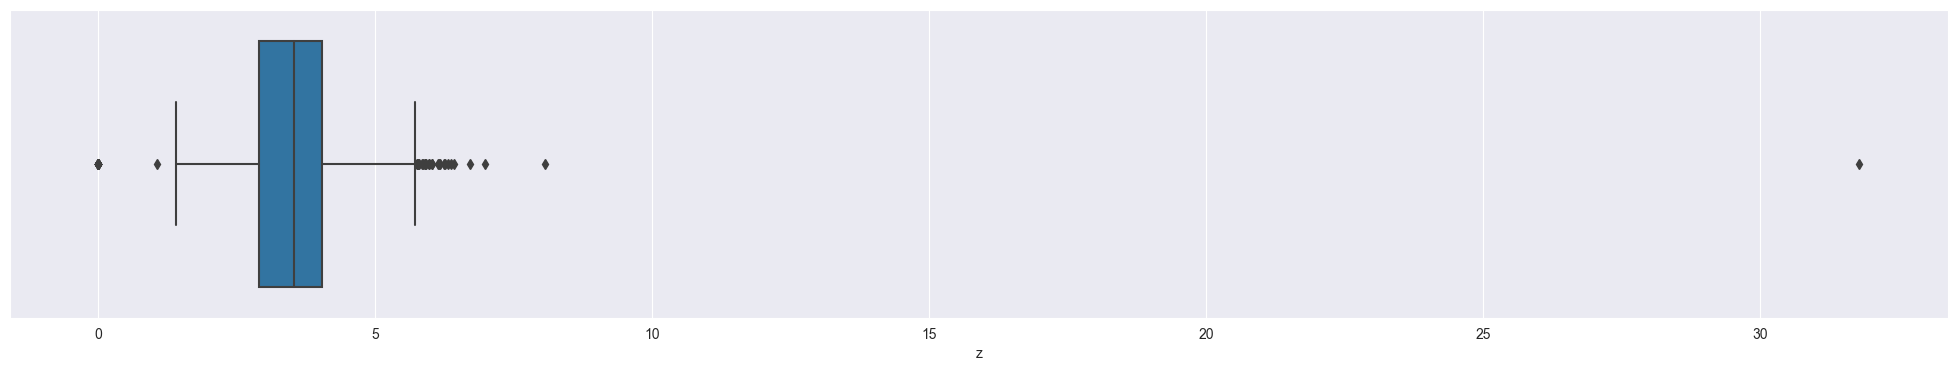

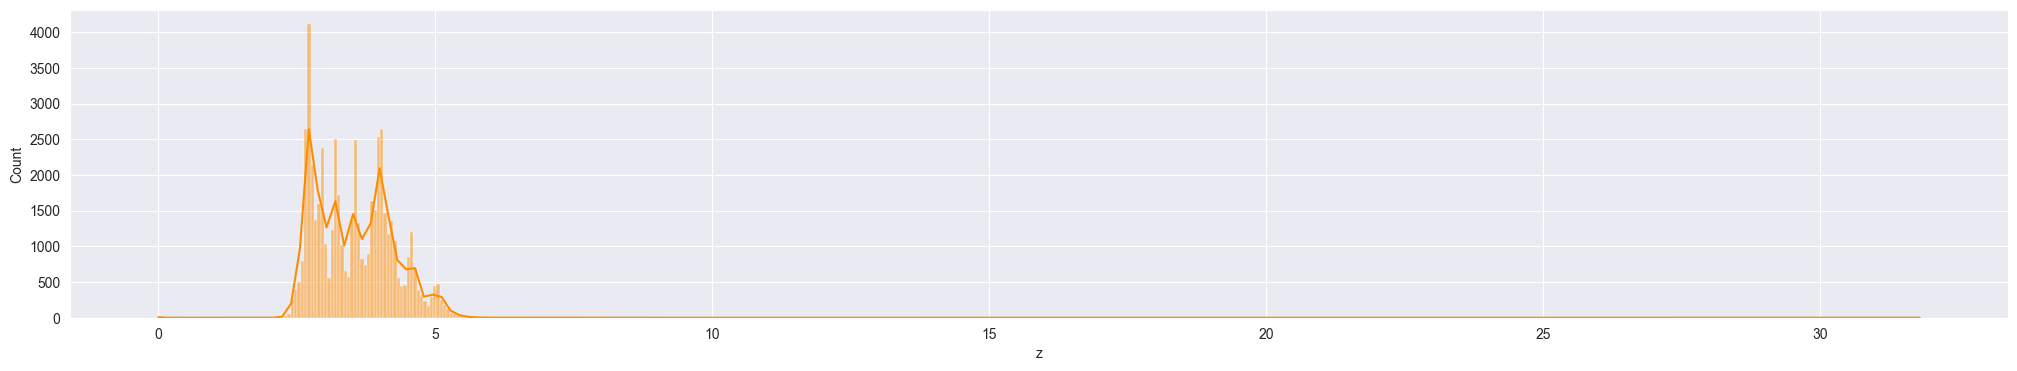

In [22]:
for i in df.columns:
    if df[i].dtype==float:
        plt.figure(figsize=(25,4))
        sns.boxplot(df, x=i)
        plt.show()
        
        plt.figure(figsize=(25,4))
        sns.histplot(df, x=i, color="darkorange", kde=True)
        plt.show()
    else:
        pass

In [6]:
df["depth"]

0        61.5
1        59.8
2        56.9
3        62.4
4        63.3
         ... 
53935    60.8
53936    63.1
53937    62.8
53938    61.0
53939    62.2
Name: depth, Length: 53940, dtype: float64

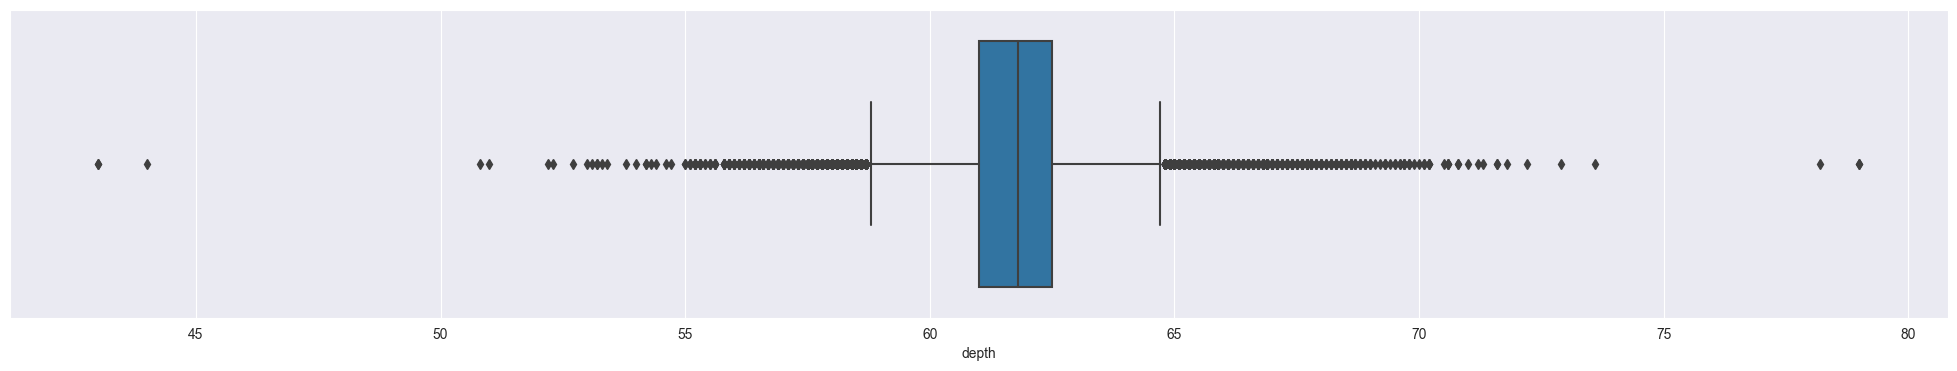

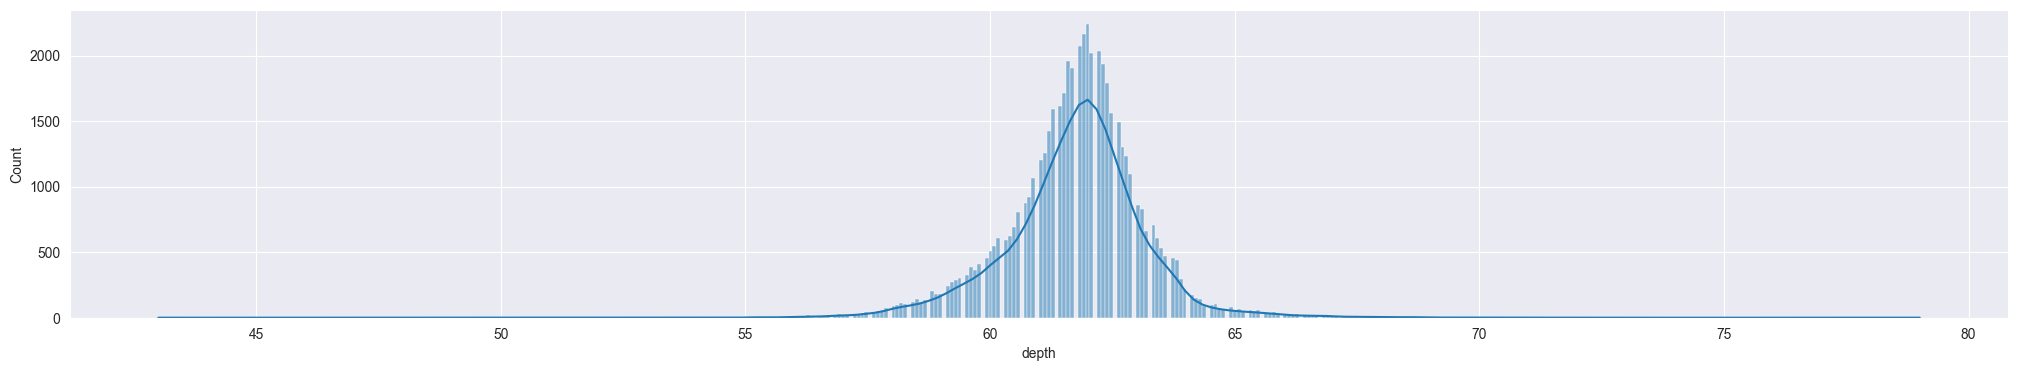

In [7]:
plt.figure(figsize=(25,4))
sns.boxplot(df, x="depth")
plt.show()

plt.figure(figsize=(25,4))
sns.histplot(df, x="depth", kde=True)
plt.show()

In [8]:
import scipy.stats as stats

In [9]:
print("Skewness: {}".format(round(stats.skew(df["depth"]),4)))
print("Kurtosis: {}".format(round(stats.kurtosis(df["depth"]),4)))

Skewness: -0.0823
Kurtosis: 5.7388


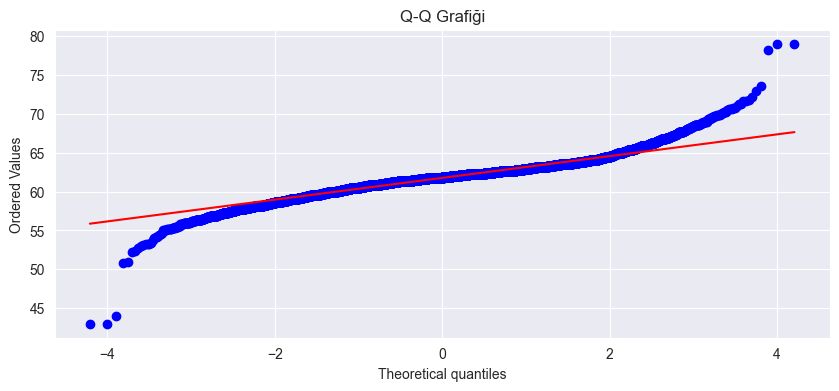

In [27]:
plt.figure(figsize=(10,4))
stats.probplot(df["depth"], dist = "norm", plot = plt)
plt.title("Q-Q Grafiği")
plt.show()

# 1- Z-score metodu

### veriler normal dağılıyorsa uygundur
### mean ve std sapma kullandığı için aykırı değerlerden çok etkilenir hesaplaması. çok outlier varsa etkinlik kaybı olur.

In [11]:
w, p = stats.shapiro(df["depth"])
 
alpha = 0.05
 
print(f"p value: {p}")

if p > alpha:
    print('H0 reddedilemez. Normal dağılım var.')
else:
    print('H0 red. Normal dağılım yok.')

p value: 0.0
H0 red. Normal dağılım yok.


In [12]:
ks, p = stats.kstest(df["depth"], "norm")
 
alpha = 0.05
 
print(f"p value: {p}")

if p > alpha:
    print('H0 reddedilemez. Normal dağılım var.')
else:
    print('H0 red. Normal dağılım yok.')

p value: 0.0
H0 red. Normal dağılım yok.


In [13]:
jb, p = stats.jarque_bera(df["depth"])
 
alpha = 0.05

print(f"p value: {p}")

if p > alpha:
    print('H0 reddedilemez. Normal dağılım var.')
else:
    print('H0 red. Normal dağılım yok.')

p value: 0.0
H0 red. Normal dağılım yok.


In [14]:
from scipy.stats import zscore

In [39]:
from scipy.stats import zscore

scores=zscore(df["table"])
mask=np.abs(scores)>3  

outliers=df["table"][mask]  #table kolonundaki outlier gözlemleri elde ettik

In [40]:
len(outliers)

336

In [41]:
outliers

2        65.0
91       69.0
227      67.0
296      66.0
314      70.0
         ... 
53542    67.0
53660    67.0
53695    65.0
53697    65.0
53785    65.0
Name: table, Length: 336, dtype: float64

In [42]:
df["table"][~mask]

0        55.0
1        61.0
3        58.0
4        58.0
5        57.0
         ... 
53935    57.0
53936    55.0
53937    60.0
53938    58.0
53939    55.0
Name: table, Length: 53604, dtype: float64

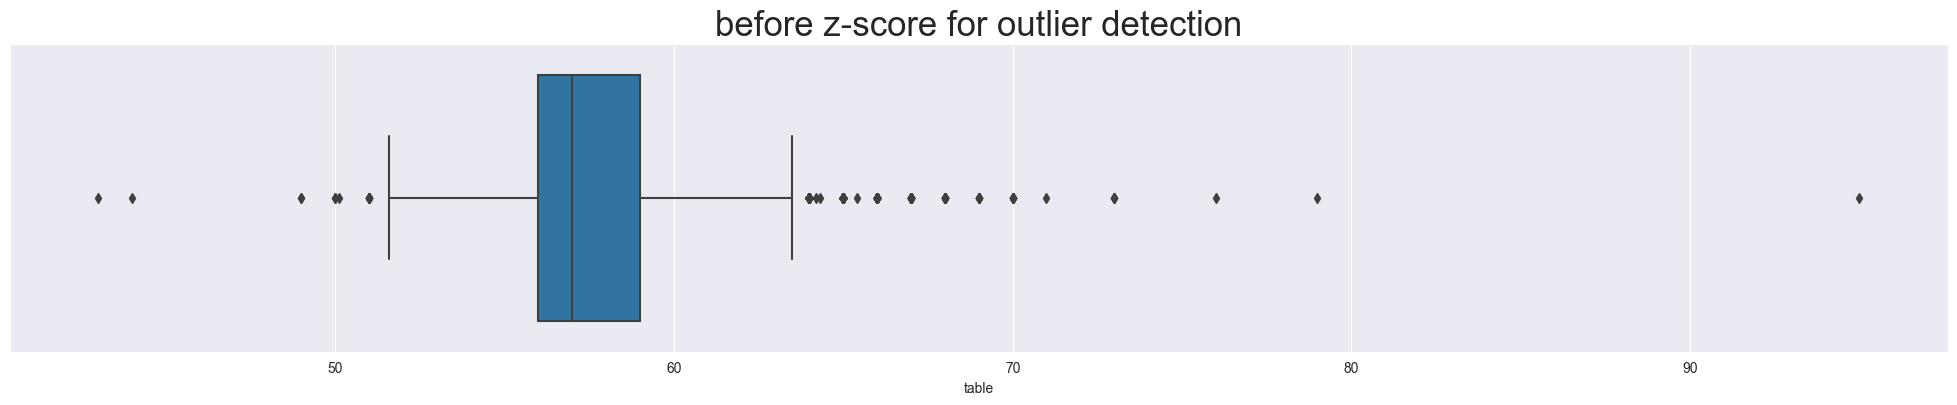

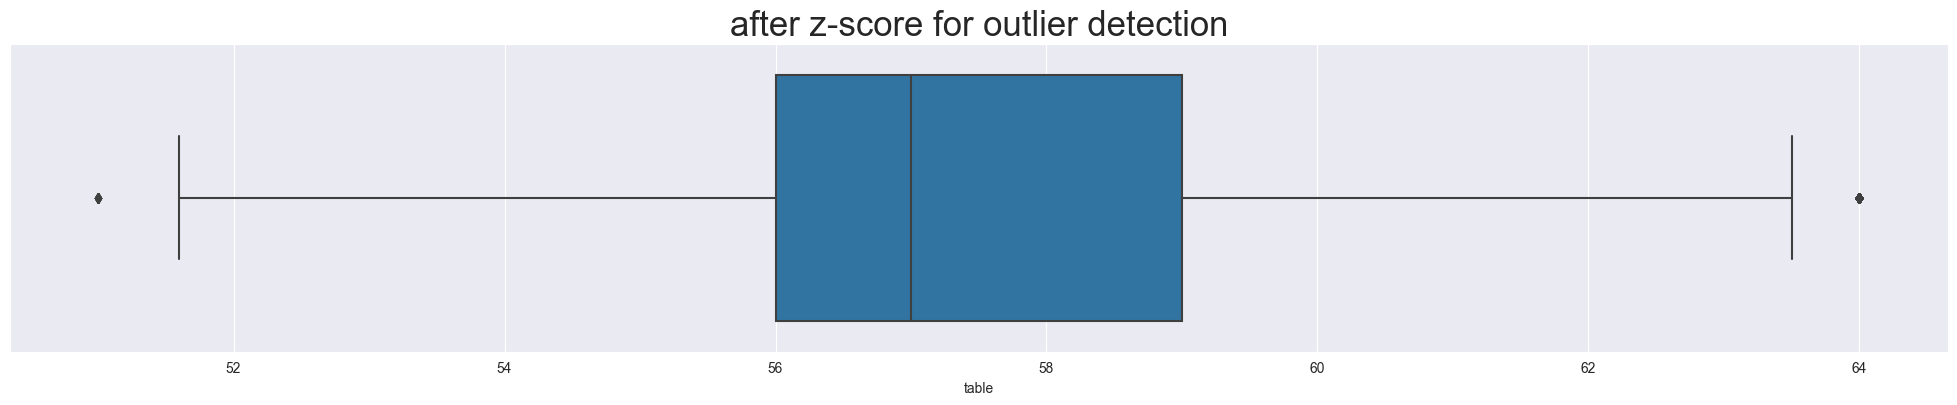

In [43]:
plt.figure(figsize=(25,4))
sns.boxplot(x=df["table"])
plt.title("before z-score for outlier detection", fontsize=25)
plt.show()

plt.figure(figsize=(25,4))
sns.boxplot(x=df["table"][~mask])
plt.title("after z-score for outlier detection", fontsize=25)
plt.show()

# 2- Median Absolute Deviation (MAD)

In [46]:
mad_score=df["depth"].apply(lambda x: np.abs(x-df["depth"].median())).median()

lower = df["depth"].median()-(3.5*mad_score)
upper = df["depth"].median()+(3.5*mad_score)

outliers = df[(df["depth"]<lower) | (df["depth"]>upper)]

In [47]:
outliers

,carat,cut,color,clarity,depth,table,price,x,y,z
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
8,0.22,Fair,E,VS2,65.1,61.0,337,3.87,3.78,2.49
24,0.31,Very Good,J,SI1,58.1,62.0,353,4.44,4.47,2.59
35,0.23,Good,F,VS1,58.2,59.0,402,4.06,4.08,2.37
42,0.26,Good,D,VS2,65.2,56.0,403,3.99,4.02,2.61
...,...,...,...,...,...,...,...,...,...,...
53890,0.73,Good,E,SI1,57.9,55.0,2749,6.00,5.96,3.46
53895,0.70,Good,F,VS1,57.8,61.0,2751,5.83,5.79,3.36
53897,1.02,Good,H,I1,64.3,63.0,2751,6.28,6.23,4.02
53918,0.76,Premium,I,VS1,59.3,62.0,2753,5.93,5.85,3.49


In [48]:
without_outliers_new_df=df[(df["depth"]>lower) & 
                           (df["depth"]<upper)].reset_index(drop=True)

In [49]:
without_outliers_new_df

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
3,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
4,0.24,Very Good,J,VVS2,62.8,57.0,336,3.94,3.96,2.48
...,...,...,...,...,...,...,...,...,...,...
49520,0.72,Ideal,D,SI1,60.8,57.0,2757,5.75,5.76,3.50
49521,0.72,Good,D,SI1,63.1,55.0,2757,5.69,5.75,3.61
49522,0.70,Very Good,D,SI1,62.8,60.0,2757,5.66,5.68,3.56
49523,0.86,Premium,H,SI2,61.0,58.0,2757,6.15,6.12,3.74


### Scipy and Pyod ile uygulama

In [50]:
from scipy.stats import median_abs_deviation

mad_score=median_abs_deviation(df["depth"])

mad_score  

0.7000000000000028

In [51]:
from pyod.models.mad import MAD

In [52]:
mad=MAD(threshold=3.5) # 3.5 önerilir Iglewicz and Hoaglin  . 3.5 defaulttur

In [53]:
label=mad.fit_predict(df["depth"].values.reshape(-1,1))

In [54]:
label  # 0 ve 1 olarak array formatında döndürür. 1 olan degerler aykırı degerlerdir.

array([0, 0, 1, ..., 0, 0, 0])

In [55]:
label.sum()  # sum ile tüm 1'leri topladık ve toplam aykırı deger adedini bulduk

1376

In [56]:
df["label"]=label

In [57]:
df[df["label"]==0]  # aykırı değerlerden arındırılmış veri seti

,carat,cut,color,clarity,depth,table,price,x,y,z,label
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43,0
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31,0
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63,0
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75,0
5,0.24,Very Good,J,VVS2,62.8,57.0,336,3.94,3.96,2.48,0
...,...,...,...,...,...,...,...,...,...,...,...
53935,0.72,Ideal,D,SI1,60.8,57.0,2757,5.75,5.76,3.50,0
53936,0.72,Good,D,SI1,63.1,55.0,2757,5.69,5.75,3.61,0
53937,0.70,Very Good,D,SI1,62.8,60.0,2757,5.66,5.68,3.56,0
53938,0.86,Premium,H,SI2,61.0,58.0,2757,6.15,6.12,3.74,0


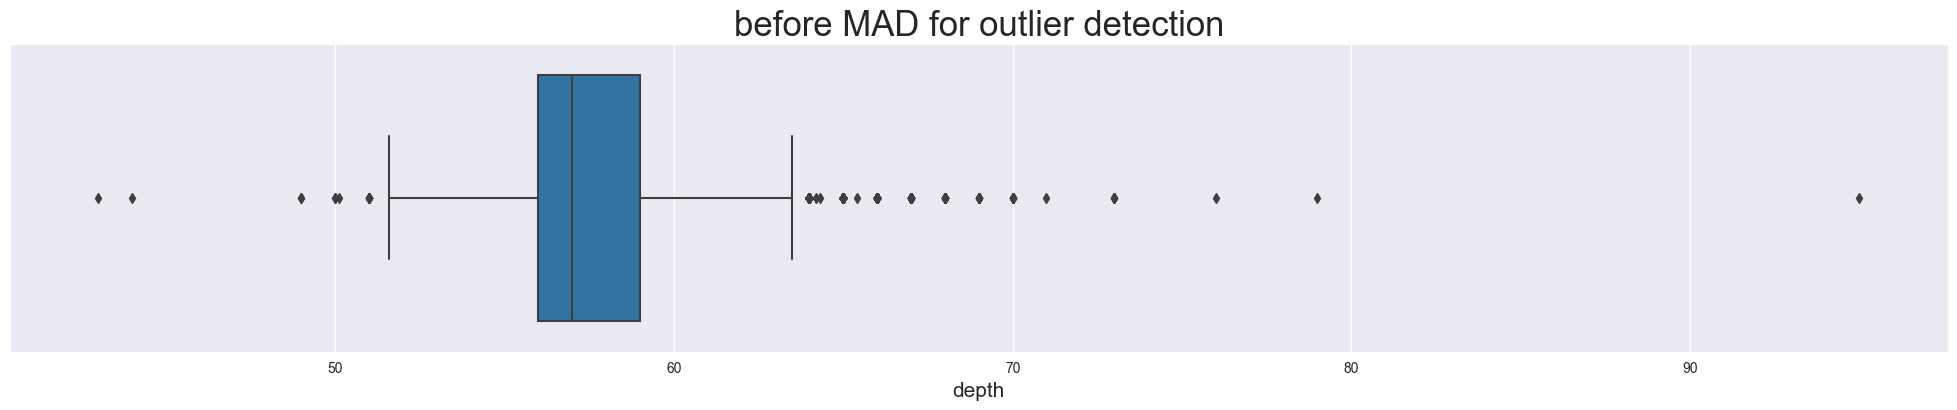

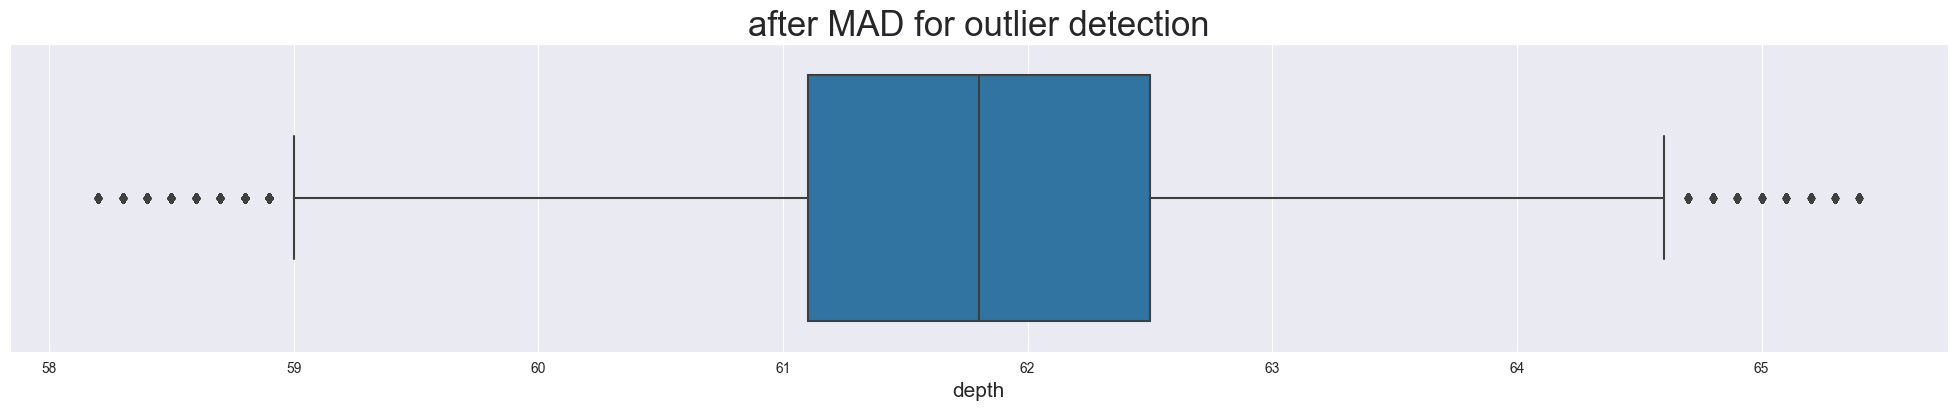

In [58]:
plt.figure(figsize=(25,4))
sns.boxplot(x=df["table"])
plt.title("before MAD for outlier detection", fontsize=25)
plt.xlabel("depth",fontsize=15)
plt.show()

plt.figure(figsize=(25,4))
sns.boxplot(x=df[df["label"]==0]["depth"])
plt.title("after MAD for outlier detection", fontsize=25)
plt.xlabel("depth",fontsize=15)
plt.show()

# 3- IQR yöntemi

In [61]:
Q1, Q3 = df["depth"].quantile(0.25), df["depth"].quantile(0.75)

IQR = Q3 - Q1

lower, upper= Q1-(1.5*IQR), Q3+(1.5*IQR)

outliers = df[(df["depth"]<lower) | (df["depth"]>upper)]

without_outliers_new_df= df[(df["depth"]>lower) &
                           (df["depth"]<upper)].reset_index(drop=True)

In [62]:
outliers

,carat,cut,color,clarity,depth,table,price,x,y,z
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
8,0.22,Fair,E,VS2,65.1,61.0,337,3.87,3.78,2.49
24,0.31,Very Good,J,SI1,58.1,62.0,353,4.44,4.47,2.59
35,0.23,Good,F,VS1,58.2,59.0,402,4.06,4.08,2.37
42,0.26,Good,D,VS2,65.2,56.0,403,3.99,4.02,2.61
...,...,...,...,...,...,...,...,...,...,...
53882,0.71,Fair,D,VS1,65.4,59.0,2747,5.62,5.58,3.66
53886,0.70,Good,D,VS2,58.0,62.0,2749,5.78,5.87,3.38
53890,0.73,Good,E,SI1,57.9,55.0,2749,6.00,5.96,3.46
53895,0.70,Good,F,VS1,57.8,61.0,2751,5.83,5.79,3.36


In [63]:
without_outliers_new_df

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
3,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
4,0.24,Very Good,J,VVS2,62.8,57.0,336,3.94,3.96,2.48
...,...,...,...,...,...,...,...,...,...,...
51390,0.72,Ideal,D,SI1,60.8,57.0,2757,5.75,5.76,3.50
51391,0.72,Good,D,SI1,63.1,55.0,2757,5.69,5.75,3.61
51392,0.70,Very Good,D,SI1,62.8,60.0,2757,5.66,5.68,3.56
51393,0.86,Premium,H,SI2,61.0,58.0,2757,6.15,6.12,3.74


In [64]:
len(without_outliers_new_df), len(outliers)

(51395, 2545)

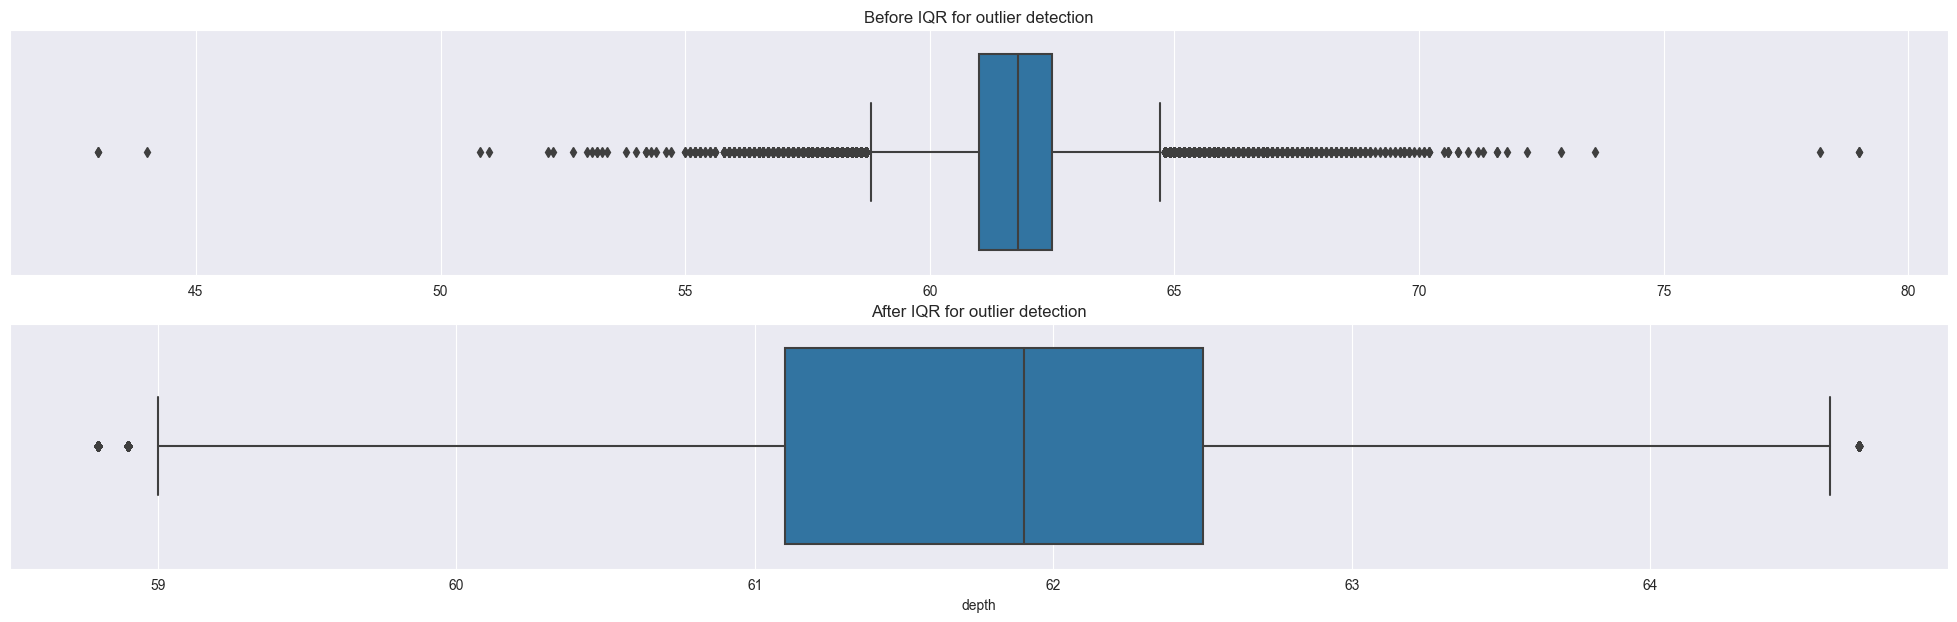

In [65]:
plt.figure(figsize=(25,7))

plt.subplot(2,1,1)
sns.boxplot(df, x="depth")
plt.title("Before IQR for outlier detection")
plt.xlabel(" ")


plt.subplot(2,1,2)
sns.boxplot(without_outliers_new_df, x="depth");
plt.title("After IQR for outlier detection")
plt.show()

# 4- Standart Sapma Yöntemi

In [68]:
mean=df["depth"].mean()
std=df["depth"].std()
cut_off= std*3

In [69]:
lower, upper= mean-cut_off, mean+cut_off

In [70]:
lower, upper

(57.45154093782605, 66.04726885082802)

In [71]:
outliers=df[(df["depth"]<lower) | (df["depth"]>upper)]
outliers

,carat,cut,color,clarity,depth,table,price,x,y,z
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
91,0.86,Fair,E,SI2,55.1,69.0,2757,6.45,6.33,3.52
97,0.96,Fair,F,SI2,66.3,62.0,2759,6.27,5.95,4.07
204,0.98,Fair,H,SI2,67.9,60.0,2777,6.05,5.97,4.08
221,0.70,Good,E,VS1,57.2,62.0,2782,5.81,5.77,3.31
...,...,...,...,...,...,...,...,...,...,...
53727,0.78,Fair,E,SI2,66.9,57.0,2721,5.70,5.66,3.60
53756,0.84,Fair,G,VS1,55.6,64.0,2724,6.42,6.32,3.54
53757,0.72,Fair,F,VS2,55.4,64.0,2724,6.06,5.97,3.34
53800,0.90,Fair,I,VS1,68.7,62.0,2732,5.83,5.79,3.99


In [72]:
without_outliers= df[(df["depth"]>lower) &
                     (df["depth"]<upper)].reset_index(drop=True)
without_outliers

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
3,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
4,0.24,Very Good,J,VVS2,62.8,57.0,336,3.94,3.96,2.48
...,...,...,...,...,...,...,...,...,...,...
53250,0.72,Ideal,D,SI1,60.8,57.0,2757,5.75,5.76,3.50
53251,0.72,Good,D,SI1,63.1,55.0,2757,5.69,5.75,3.61
53252,0.70,Very Good,D,SI1,62.8,60.0,2757,5.66,5.68,3.56
53253,0.86,Premium,H,SI2,61.0,58.0,2757,6.15,6.12,3.74


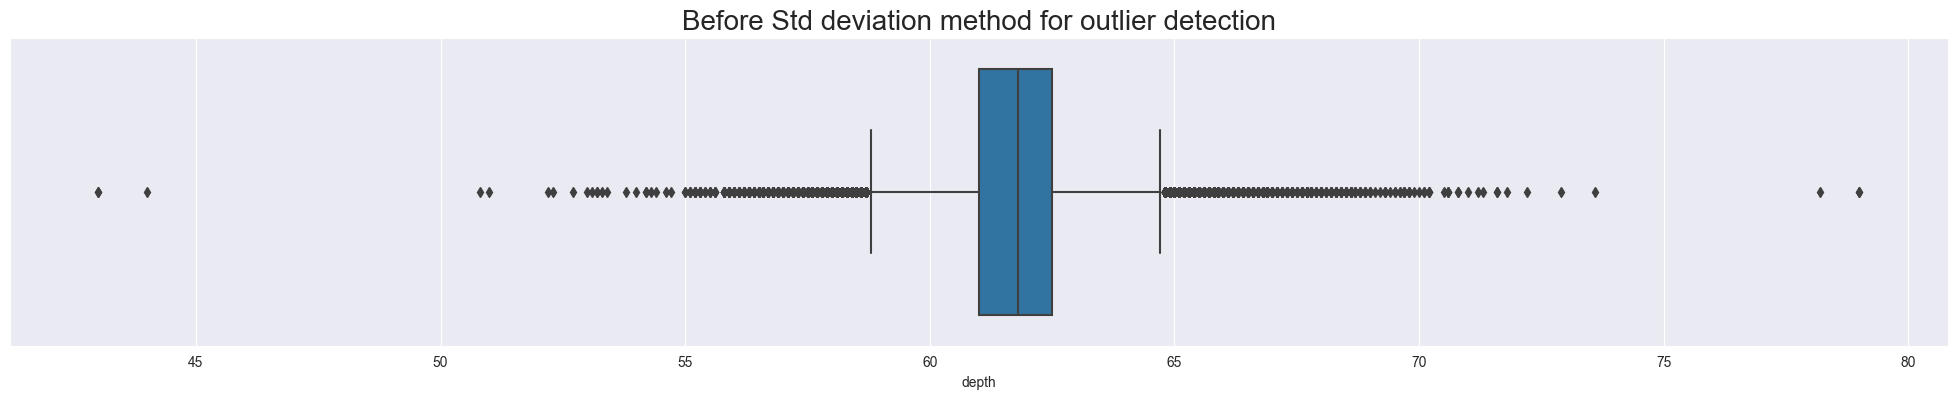

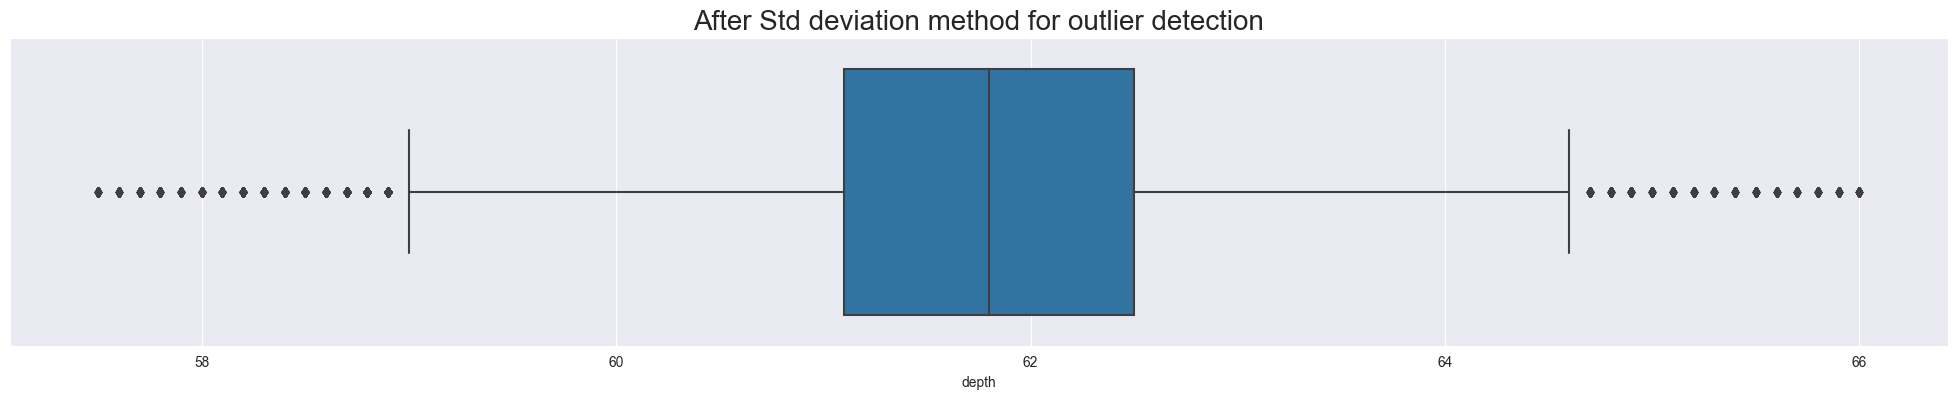

In [73]:
plt.figure(figsize=(25,4))
sns.boxplot(x=df["depth"])
plt.title("Before Std deviation method for outlier detection", fontsize=20)
plt.show()

plt.figure(figsize=(25,4))
sns.boxplot(x=without_outliers["depth"])
plt.title("After Std deviation method for outlier detection", fontsize=20)
plt.show()

# 5- Winsorization

In [76]:
from scipy.stats.mstats import winsorize

In [77]:
df["winsorized"]=winsorize(df["depth"], limits=[0.05, 0.01])

In [78]:
df.head(10)

,carat,cut,color,clarity,depth,table,price,x,y,z,winsorized
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43,61.5
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31,59.8
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31,59.3
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63,62.4
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75,63.3
5,0.24,Very Good,J,VVS2,62.8,57.0,336,3.94,3.96,2.48,62.8
6,0.24,Very Good,I,VVS1,62.3,57.0,336,3.95,3.98,2.47,62.3
7,0.26,Very Good,H,SI1,61.9,55.0,337,4.07,4.11,2.53,61.9
8,0.22,Fair,E,VS2,65.1,61.0,337,3.87,3.78,2.49,65.1
9,0.23,Very Good,H,VS1,59.4,61.0,338,4.00,4.05,2.39,59.4


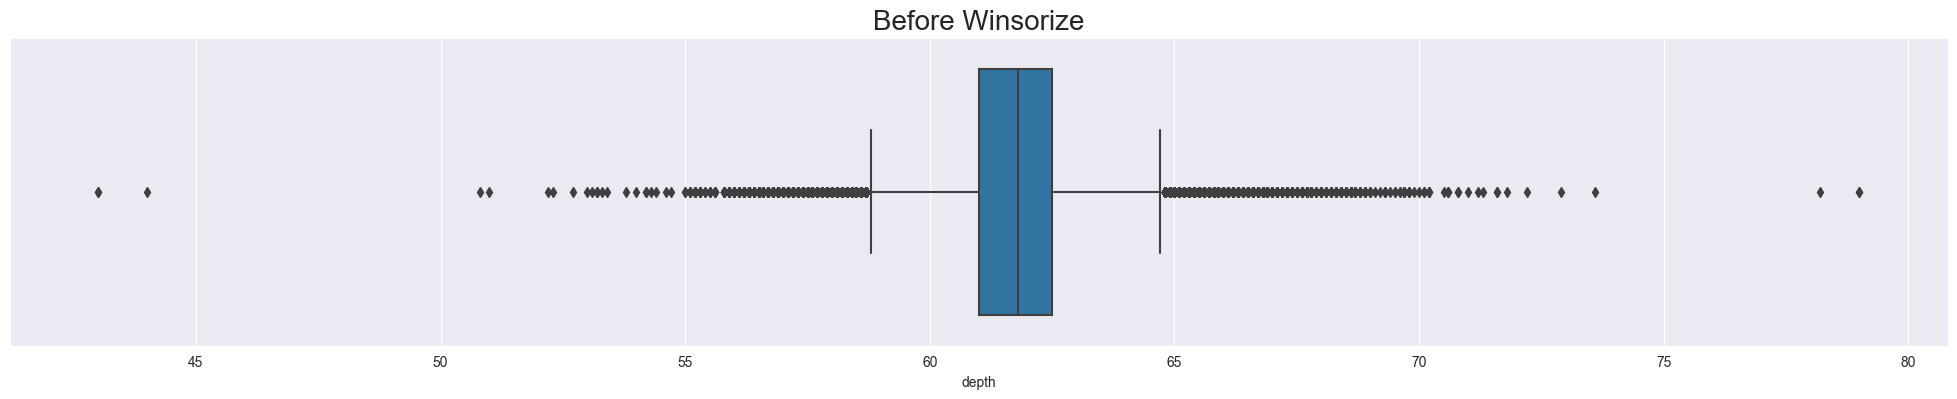

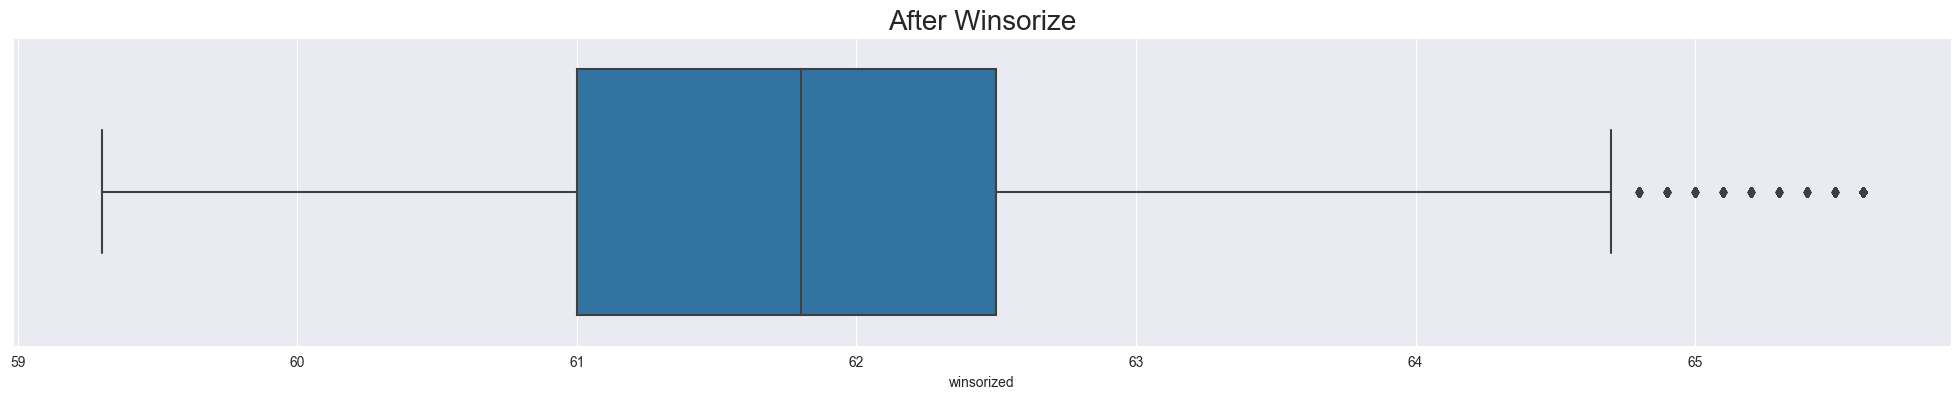

In [79]:
plt.figure(figsize=(25,4))
sns.boxplot(x=df["depth"])
plt.title("Before Winsorize", fontsize=20)
plt.show()

plt.figure(figsize=(25,4))
sns.boxplot(x=df["winsorized"])
plt.title("After Winsorize", fontsize=20)
plt.show()